In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv(r"C:\Documents\Machine Learning\df.csv")
df1 = pd.read_csv(r"C:\Documents\Machine Learning\df1.csv")

In [3]:
df.head()

,Unnamed: 0,duration,poutcome_success,month_oct,month_mar,month_sep,pdays,previous,job_retired,job_student,...,education_secondary,marital_married,campaign,loan_yes,job_blue-collar,month_may,housing_yes,contact_unknown,poutcome_unknown,subscribed
0,0,44,0,0,0,0,-1,0,0,0,...,0,1,2,0,0,0,0,0,1,0
1,1,91,0,0,0,0,-1,0,0,0,...,1,1,2,0,0,0,0,0,1,0
2,2,240,0,0,0,0,-1,0,0,0,...,1,1,1,0,0,0,1,0,1,0
3,3,867,1,0,0,0,84,3,0,0,...,0,0,1,0,0,0,0,0,0,1
4,4,380,0,0,0,0,-1,0,0,0,...,1,1,1,0,0,0,1,0,1,0


In [4]:
df = df.drop(columns='Unnamed: 0',axis=0)
df1 = df1.drop(columns='Unnamed: 0',axis=0)

In [5]:
df

,duration,poutcome_success,month_oct,month_mar,month_sep,pdays,previous,job_retired,job_student,month_dec,...,education_secondary,marital_married,campaign,loan_yes,job_blue-collar,month_may,housing_yes,contact_unknown,poutcome_unknown,subscribed
0,44,0,0,0,0,-1,0,0,0,0,...,0,1,2,0,0,0,0,0,1,0
1,91,0,0,0,0,-1,0,0,0,0,...,1,1,2,0,0,0,0,0,1,0
2,240,0,0,0,0,-1,0,0,0,0,...,1,1,1,0,0,0,1,0,1,0
3,867,1,0,0,0,84,3,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,380,0,0,0,0,-1,0,0,0,0,...,1,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,116,0,0,0,0,-1,0,0,0,0,...,0,0,2,0,0,1,1,0,1,0
31643,438,0,0,0,0,-1,0,0,0,0,...,0,0,2,1,0,0,0,0,1,1
31644,37,0,0,0,0,-1,0,0,0,0,...,0,0,3,0,0,0,0,0,1,0
31645,22,0,0,0,0,337,12,0,0,0,...,1,1,7,0,0,1,1,0,0,0


#### Splitting the data into X and y

In [6]:
X = df.drop('subscribed',axis=1) # Predictor feature columns (8 X m)
y = df['subscribed'] # Predicted y (1=True, 0=False) (1 X m)

In [7]:
n_true = len(df.loc[df['subscribed'] == True])
n_false = len(df.loc[df['subscribed'] == False])

print("Number of subscribers: {0} ({1:2.2f}%)".format(n_true, (n_true /(n_true + n_false)) * 100 ))

print("Number of non-subscribers: {0} ({1:2.2f}%)".format(n_false,(n_false / (n_true + n_false)) * 100))

Number of subscribers: 3715 (11.74%)
Number of non-subscribers: 27932 (88.26%)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=23)

#### Logistic Model

In [9]:
# Logistic Model
log_model = LogisticRegression()

# Model Fitting
log_model.fit(X_train,y_train)

# Making Predictions on Train and Test
train_pred = log_model.predict(X_train)
test_pred = log_model.predict(X_test)

c:\Users\Shrawani\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print("Test Accuracy :",metrics.accuracy_score(y_test,test_pred))
print("Train Accuracy :",metrics.accuracy_score(y_train,train_pred))

Test Accuracy : 0.8881516587677725
Train Accuracy : 0.8928764897074756


In [11]:
print("Classification Report")
print(metrics.classification_report(y_test,test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8370
           1       0.57      0.22      0.31      1125

    accuracy                           0.89      9495
   macro avg       0.74      0.60      0.63      9495
weighted avg       0.86      0.89      0.87      9495



#### Decision Tree

In [12]:
dt = DecisionTreeClassifier(criterion='gini',random_state=23)
dt.fit(X_train,y_train)

train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)

In [13]:
print("Test Accuracy :",metrics.accuracy_score(y_test,test_pred))
print("Train Accuracy :",metrics.accuracy_score(y_train,train_pred))

Test Accuracy : 0.8727751448130595
Train Accuracy : 1.0


In [14]:
print("Classification Report")
print(metrics.classification_report(y_test,test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      8370
           1       0.47      0.49      0.48      1125

    accuracy                           0.87      9495
   macro avg       0.70      0.71      0.70      9495
weighted avg       0.88      0.87      0.87      9495



#### Random Forest

In [15]:
rf = RandomForestClassifier(n_estimators=10, random_state=23)
rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [16]:
# Accuracy
print("Test Accuracy :",metrics.accuracy_score(y_test,test_pred))
print("Train Accuracy :",metrics.accuracy_score(y_train,train_pred))

Test Accuracy : 0.89594523433386
Train Accuracy : 0.9920097508125677


In [17]:
print("Classification Report")
print(metrics.classification_report(y_test,test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8370
           1       0.61      0.33      0.43      1125

    accuracy                           0.90      9495
   macro avg       0.76      0.65      0.69      9495
weighted avg       0.88      0.90      0.88      9495



#### Naive Bayes

In [18]:
# creating the model
naive_bayes = GaussianNB()

# training the model
naive_bayes.fit(X_train,y_train)

train_pred = naive_bayes.predict(X_train)
test_pred = naive_bayes.predict(X_test)

In [19]:
# checking the R2 score
print("Test Accuracy :",metrics.accuracy_score(y_test,test_pred))
print("Train Accuracy :",metrics.accuracy_score(y_train,train_pred))

Test Accuracy : 0.8584518167456556
Train Accuracy : 0.8585680751173709


In [20]:
print("Classification Report")
print(metrics.classification_report(y_test,test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8370
           1       0.42      0.50      0.45      1125

    accuracy                           0.86      9495
   macro avg       0.67      0.70      0.69      9495
weighted avg       0.87      0.86      0.86      9495



#### Lets apply the model on the Test Data i.e df1

In [21]:
# Logistic Model
rf = RandomForestClassifier(n_estimators=10, random_state=23)
rf.fit(X_train, y_train)


# Making Predictions on Train and Tes
test_pred = rf.predict(df1)

In [22]:
df1['predicted_subscribed'] = test_pred

In [23]:
df1['predicted_subscribed'].value_counts()

predicted_subscribed
0    12720
1      844
Name: count, dtype: int64

In [24]:
df1['predicted_subscribed'] = df1['predicted_subscribed'].replace({0:'no',1:'yes'})

In [25]:
df_pred = df1

In [26]:
df_pred.to_csv('df_pred.csv')

c:\Users\Shrawani\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


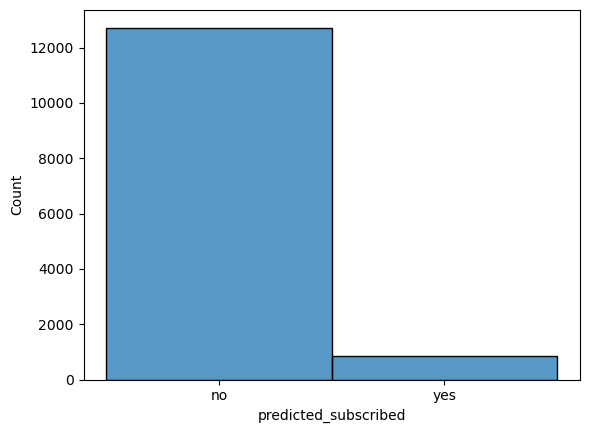

In [27]:
sns.histplot(df1['predicted_subscribed'])
plt.show()